In [1]:
import random
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  #MacOS自带
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import pandas as pd
from pandas import Series, DataFrame

In [2]:
df = pd.read_csv('data/healthExpense.csv')
df.shape

(274, 4)

In [3]:
df.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

In [4]:
# 获取特定年份的数据
# df.iloc[df.groupby(df['Year']).groups[1970]]
df.groupby(df['Year']).get_group(1970)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [5]:
# 获取特定国家的数据
df.groupby(df['Country']).get_group('USA').head(4)

,Year,Country,Spending_USD,Life_Expectancy
4,1970,USA,326.961,70.9
9,1971,USA,357.988,71.2
12,1972,USA,397.097,71.2
15,1973,USA,439.302,71.4


In [6]:
# 查看历年健康开销最大和最小的国家
for groupName, groupValue in df.groupby(df['Year']):
    print(groupName)
    print(f"开销最大: {groupValue['Country'][groupValue['Spending_USD'].idxmax()]}[{groupValue['Spending_USD'].max()}]")
    print(f"开销最小: {groupValue['Country'][groupValue['Spending_USD'].idxmin()]}[{groupValue['Spending_USD'].min()}]")

1970
开销最大: USA[326.961]
开销最小: Great Britain[123.993]
1971
开销最大: USA[357.988]
开销最小: Great Britain[134.172]
1972
开销最大: USA[397.097]
开销最小: Japan[185.39]
1973
开销最大: USA[439.302]
开销最小: Japan[205.778]
1974
开销最大: USA[495.114]
开销最小: Japan[242.018]
1975
开销最大: USA[560.75]
开销最小: Japan[284.269]
1976
开销最大: USA[638.851]
开销最小: Japan[303.725]
1977
开销最大: USA[726.241]
开销最小: Japan[340.628]
1978
开销最大: USA[808.884]
开销最小: Japan[392.577]
1979
开销最大: USA[908.963]
开销最小: Japan[452.931]
1980
开销最大: USA[1036.3]
开销最小: Great Britain[385.099]
1981
开销最大: USA[1191.537]
开销最小: Great Britain[433.957]
1982
开销最大: USA[1329.669]
开销最小: Great Britain[448.477]
1983
开销最大: USA[1451.945]
开销最小: Great Britain[501.924]
1984
开销最大: USA[1590.667]
开销最小: Great Britain[521.522]
1985
开销最大: USA[1735.156]
开销最小: Great Britain[549.608]
1986
开销最大: USA[1847.773]
开销最小: Great Britain[578.61]
1987
开销最大: USA[1976.166]
开销最小: Great Britain[634.956]
1988
开销最大: USA[2195.392]
开销最小: Great Britain[688.049]
1989
开销最大: USA[2424.654]
开销最小: Great Britain[739.714]

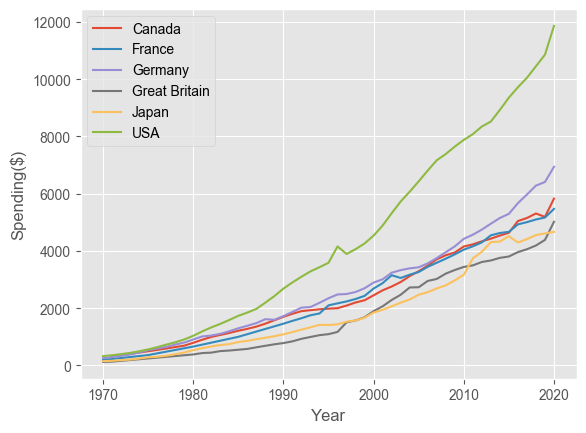

In [7]:
with plt.style.context('ggplot'):
    for groupName,groupValue in df.groupby(df['Country']):
        plt.plot(df.groupby(df['Country']).get_group(groupName)['Year'], df.groupby(df['Country']).get_group(groupName)['Spending_USD'], label=f'{groupName}')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Spending($)')
    plt.show()

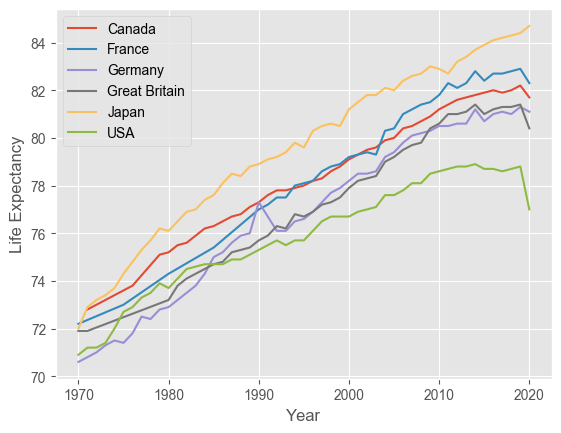

In [8]:
with plt.style.context('ggplot'):
    for groupName,groupValue in df.groupby(df['Country']):
        plt.plot(df.groupby(df['Country']).get_group(groupName)['Year'], df.groupby(df['Country']).get_group(groupName)['Life_Expectancy'], label=f'{groupName}')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.show()

In [9]:
data = pd.DataFrame(columns=df['Country'].unique())
def setData(row):
    data.loc[row['Year'], row['Country']] = row['Spending_USD']
    return row
df = df.apply(setData, axis=1)
data.fillna(0, inplace=True)
data.head(5)

,Germany,France,Great Britain,Japan,USA,Canada
1970,252.311,192.143,123.993,150.437,326.961,0.000
1971,298.251,0.000,134.172,163.854,357.988,313.391
1972,337.364,0.000,0.000,185.390,397.097,0.000
1973,384.541,0.000,0.000,205.778,439.302,0.000
1974,452.744,0.000,0.000,242.018,495.114,0.000


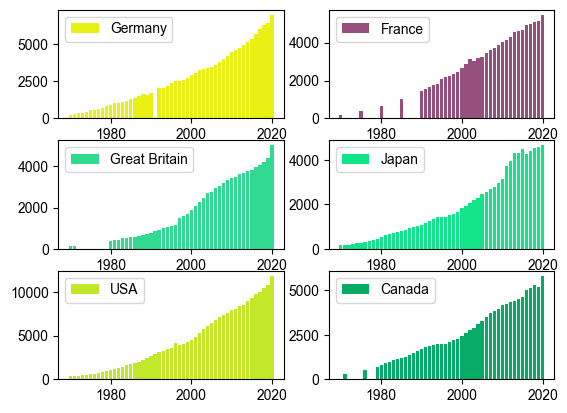

In [10]:
columns = Series(data.columns)
fig, axs = plt.subplots(round(len(columns)/2),2)
colors = []
def random_colors():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r,g,b)
with plt.style.context('tableau-colorblind10'):
    for columnName in data.columns:
        fig_index = columns[columns == columnName].index[0]
        m, n = int(fig_index/2), fig_index%2
        x = list(data.index)
        y = data[columnName].values
        axs[m,n].bar(x, y, label=columnName, color=random_colors())
        axs[m,n].legend()
    plt.show()

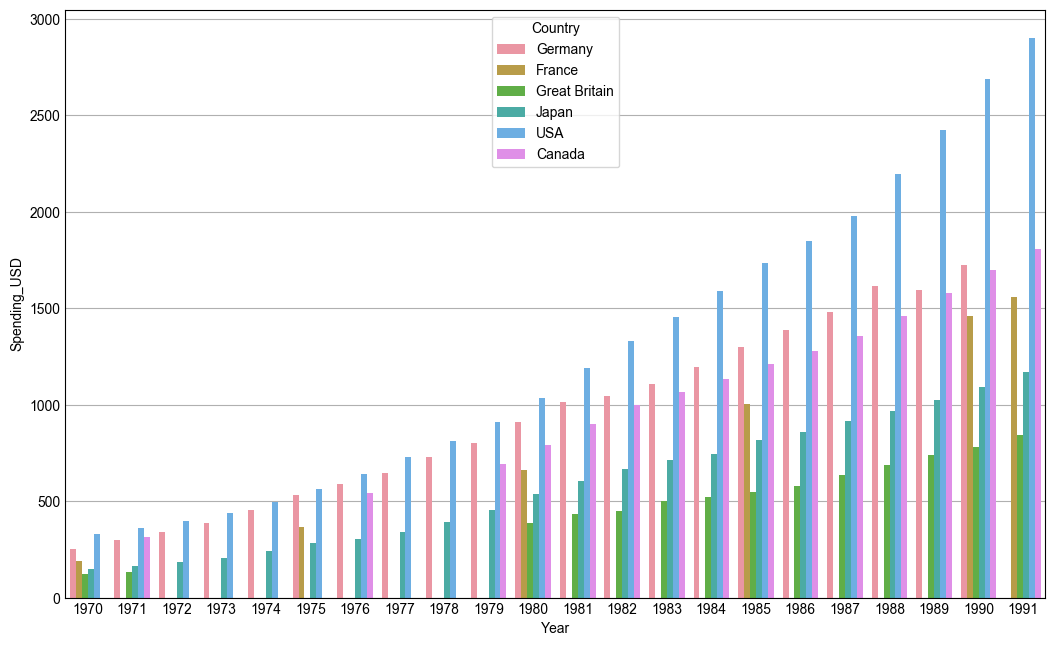

In [11]:
with plt.style.context('_mpl-gallery'):
    fig = sns.barplot(x="Year", y="Spending_USD", hue="Country", data=df[:100], errorbar=None)
    fig.figure.set_size_inches(10,6)
    plt.show()

In [12]:
df[['Spending_USD','Life_Expectancy']].head()

,Spending_USD,Life_Expectancy
0,252.311,70.6
1,192.143,72.2
2,123.993,71.9
3,150.437,72.0
4,326.961,70.9


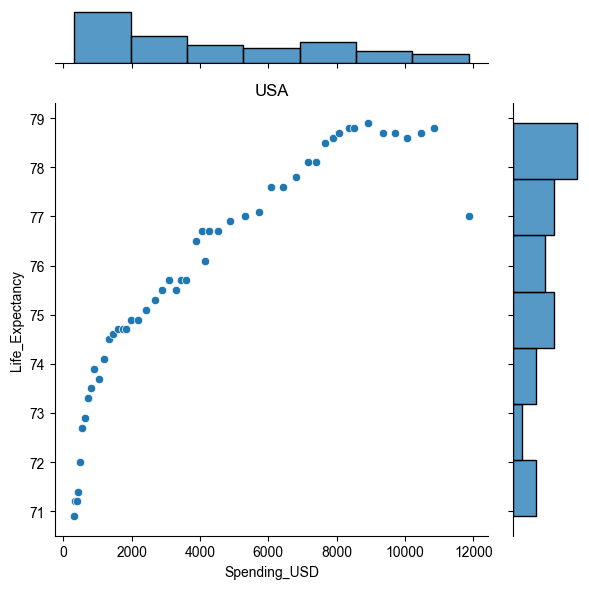

In [13]:
countryName = 'USA'
groups = df.groupby('Country')
data = groups.get_group(countryName)[['Spending_USD','Life_Expectancy']]
sns.jointplot(x='Spending_USD',y='Life_Expectancy', data=data, kind='scatter')
plt.title(countryName)
plt.tight_layout()
plt.show()